In [2]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils_2 import plot_policy, plot_action_values, test_agent

In [3]:
env = Maze()

In [21]:
action_values = np.zeros(shape=(5, 5, 4))

In [22]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

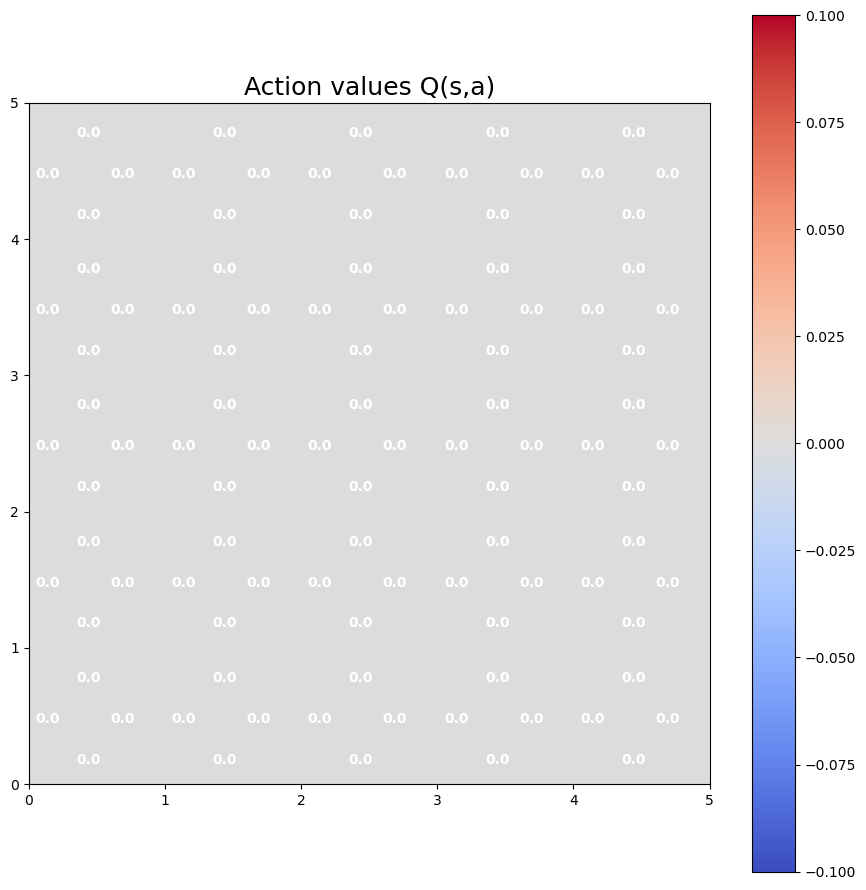

In [23]:
plot_action_values(action_values)

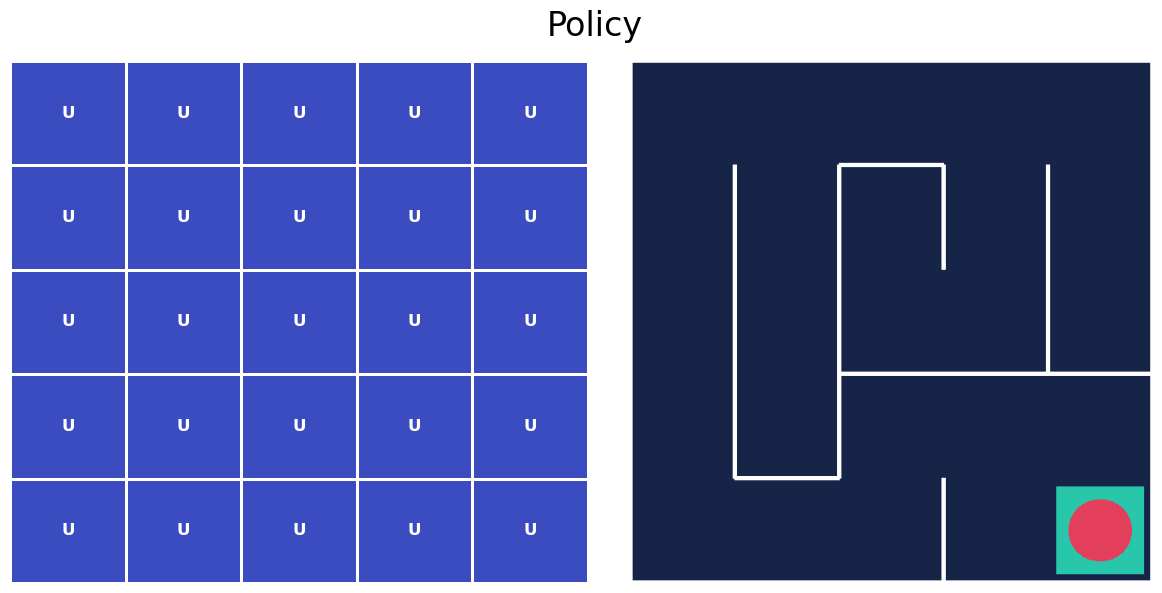

In [24]:
plot_policy(action_values, env.render(mode='rgb_array'))

In [25]:
#policy is the action definer
#action_value table is the optimised q value
#alpha is the learning learning rate
#gamma is the discount factor
#epsilon is the random probability to choose an action from policy
#qsa is the q value for the current state and the current action
#next_qsa is the q value for the next state and next action
#action value is updated with the on policy temporal difference formula.
def sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        done = False
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = policy(next_state, epsilon)
            
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state
            action = next_action

In [32]:
sarsa(action_values, policy, 10000)

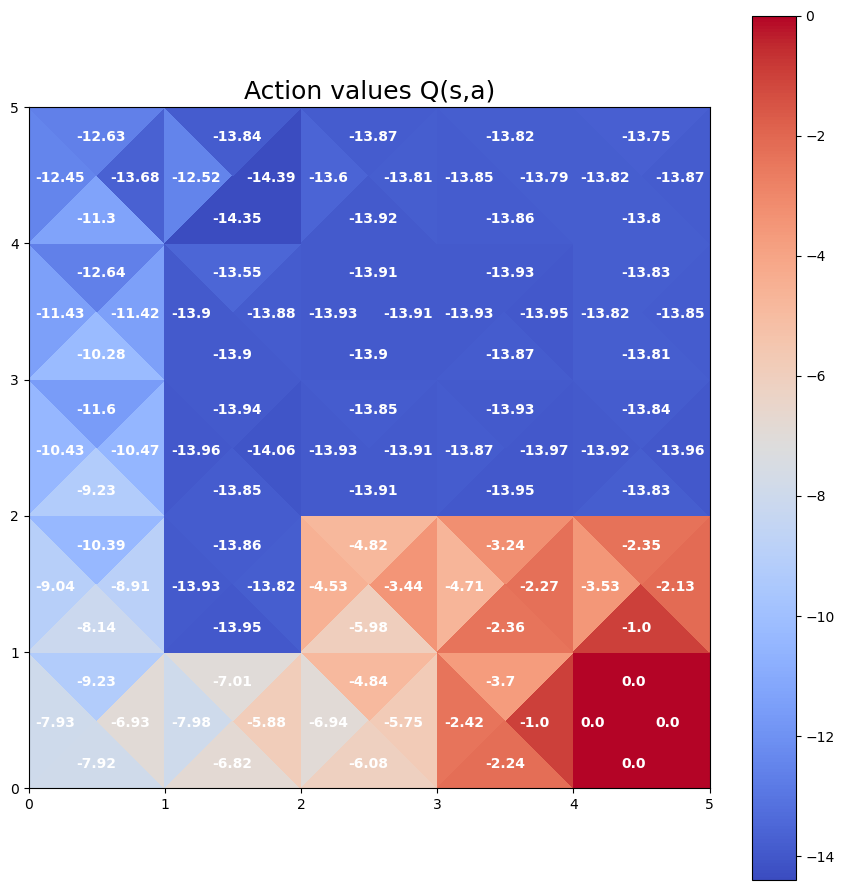

In [33]:
plot_action_values(action_values)

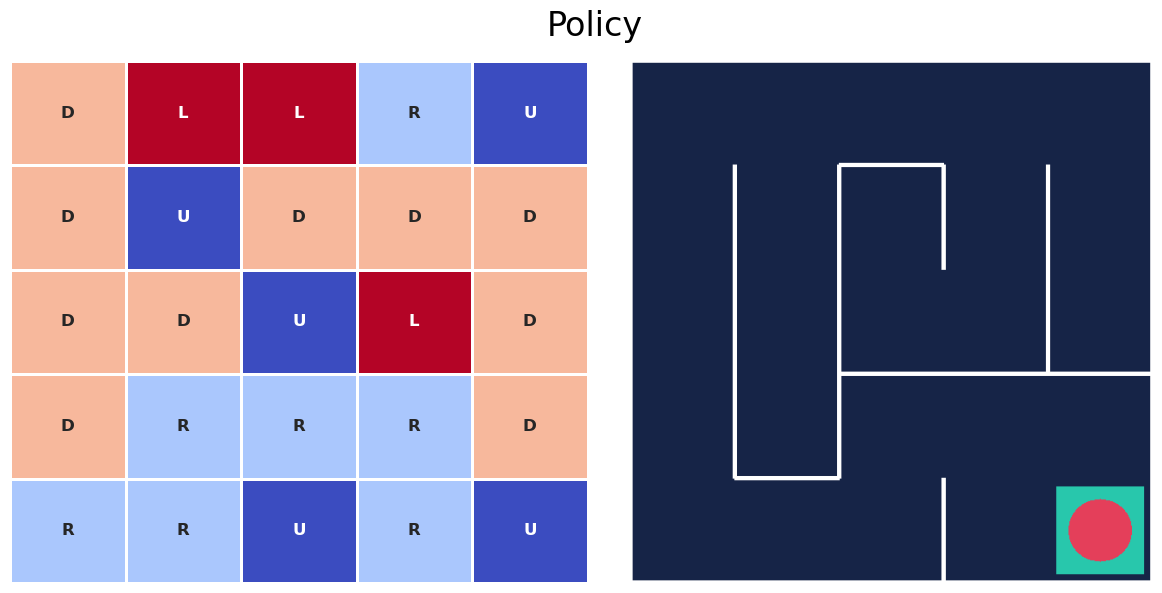

In [34]:
plot_policy(action_values, env.render(mode='rgb_array'))